In [1]:
import yfinance as yf

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
msft = yf.Ticker("MSFT")

In [13]:
dataset = msft.history(period="5y")

In [17]:
dataset

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2015-09-04,38.91,39.11,38.35,38.72,37138800,0.0,0
2015-09-08,39.35,39.99,39.26,39.89,32469800,0.0,0
2015-09-09,40.18,40.35,39.00,39.14,33469500,0.0,0
2015-09-10,39.19,39.80,38.85,39.34,31366600,0.0,0
2015-09-11,39.21,39.61,39.02,39.51,27132500,0.0,0
...,...,...,...,...,...,...,...
2020-08-31,227.00,228.70,224.31,225.53,28774200,0.0,0
2020-09-01,225.51,227.45,224.43,227.27,25791200,0.0,0
2020-09-02,227.97,232.86,227.35,231.65,34080800,0.0,0


In [21]:
dataset['Date'] = dataset.index

In [22]:
dataset

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date
Date,,,,,,,,
2015-09-04,38.91,39.11,38.35,38.72,37138800,0.0,0,2015-09-04
2015-09-08,39.35,39.99,39.26,39.89,32469800,0.0,0,2015-09-08
2015-09-09,40.18,40.35,39.00,39.14,33469500,0.0,0,2015-09-09
2015-09-10,39.19,39.80,38.85,39.34,31366600,0.0,0,2015-09-10
2015-09-11,39.21,39.61,39.02,39.51,27132500,0.0,0,2015-09-11
...,...,...,...,...,...,...,...,...
2020-08-31,227.00,228.70,224.31,225.53,28774200,0.0,0,2020-08-31
2020-09-01,225.51,227.45,224.43,227.27,25791200,0.0,0,2020-09-01
2020-09-02,227.97,232.86,227.35,231.65,34080800,0.0,0,2020-09-02


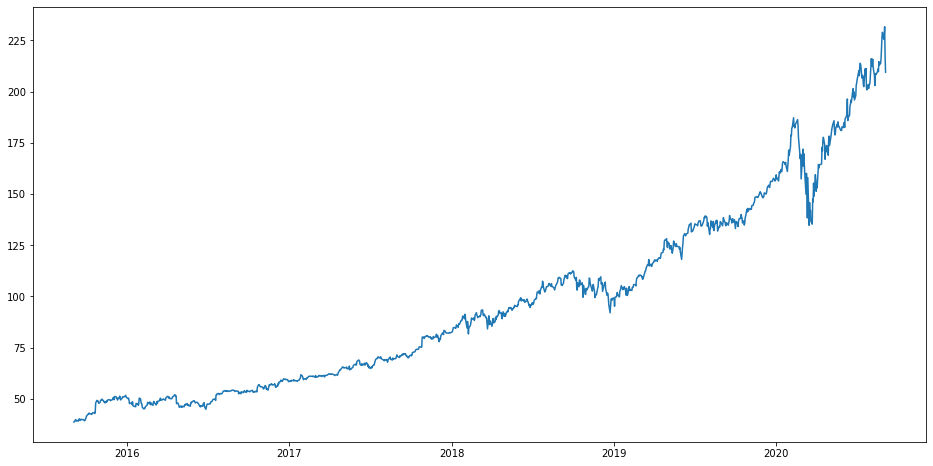

In [45]:
dataset["Date"]=pd.to_datetime(dataset['Date'],format="%Y-%m-%d")
dataset.index=dataset['Date']
plt.figure(figsize=(16,8))
plt.plot(dataset["Close"],label='Close Price history')

In [46]:
data=dataset.sort_index(ascending=True,axis=0)
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date
Date,,,,,,,,
2015-09-04,38.91,39.11,38.35,38.72,37138800,0.0,0,2015-09-04
2015-09-08,39.35,39.99,39.26,39.89,32469800,0.0,0,2015-09-08
2015-09-09,40.18,40.35,39.00,39.14,33469500,0.0,0,2015-09-09
2015-09-10,39.19,39.80,38.85,39.34,31366600,0.0,0,2015-09-10
2015-09-11,39.21,39.61,39.02,39.51,27132500,0.0,0,2015-09-11
...,...,...,...,...,...,...,...,...
2020-08-31,227.00,228.70,224.31,225.53,28774200,0.0,0,2020-08-31
2020-09-01,225.51,227.45,224.43,227.27,25791200,0.0,0,2020-09-01
2020-09-02,227.97,232.86,227.35,231.65,34080800,0.0,0,2020-09-02


In [47]:
new_dataset=pd.DataFrame(index=range(0,len(dataset)),columns=['Date','Close'])
for i in range(0,len(data)):
    new_dataset["Date"][i]=data['Date'][i]
    new_dataset["Close"][i]=data["Close"][i]

In [48]:
new_dataset

,Date,Close
0,2015-09-04 00:00:00,38.72
1,2015-09-08 00:00:00,39.89
2,2015-09-09 00:00:00,39.14
3,2015-09-10 00:00:00,39.34
4,2015-09-11 00:00:00,39.51
...,...,...
1255,2020-08-31 00:00:00,225.53
1256,2020-09-01 00:00:00,227.27
1257,2020-09-02 00:00:00,231.65
1258,2020-09-03 00:00:00,217.3


In [49]:
from sklearn.preprocessing import MinMaxScaler

In [50]:
scaler=MinMaxScaler(feature_range=(0,1))
final_dataset=new_dataset.values
train_data=final_dataset[0:1000,:]
valid_data=final_dataset[1000:,:]
new_dataset.drop(["Date"],axis=1,inplace=True)

In [51]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(final_dataset)
x_train_data,y_train_data=[],[]
for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])
    
x_train_data,y_train_data=np.array(x_train_data),np.array(y_train_data)
x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))

TypeError: float() argument must be a string or a number, not 'Timestamp'

In [44]:
final_dataset

array([[38.72],
       [39.89],
       [39.14],
       ...,
       [231.65],
       [217.3],
       [209.43]], dtype=object)